# Module_19_Threading

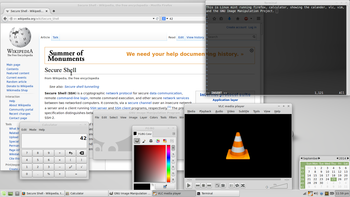

### Lets see what we will learn:

- What is the difference between **multitasking**, **multiprocessing**
- Types of Multitasking
- What is a thread
- How to acheive multithreading in Python
- When to use multithreading in Python
- How to create threads in Python
    - Without creating a class
    - By extending Thread class
    - Without extending thread class
- What are the advantages and disadvantages of multithreading

### **MULTIPROCESSING**<br>
Multiprocessing refers to the ability of a system to support more than one processor at the same time.<br>
**A multiprocessing system can have:**<br>

- multiprocessor, i.e. a computer with more than one central processor.<br>
- multi-core processor, i.e. a single computing component with two or more independent actual processing units (called “cores”).<br>

### **MULTITASKING / MULTITHREADING:** <br>
It is the ability of an operating system to perform different tasks at the same time.Tasks sharing a common resource (like 1 CPU). Here tasks are called as threads.<br>


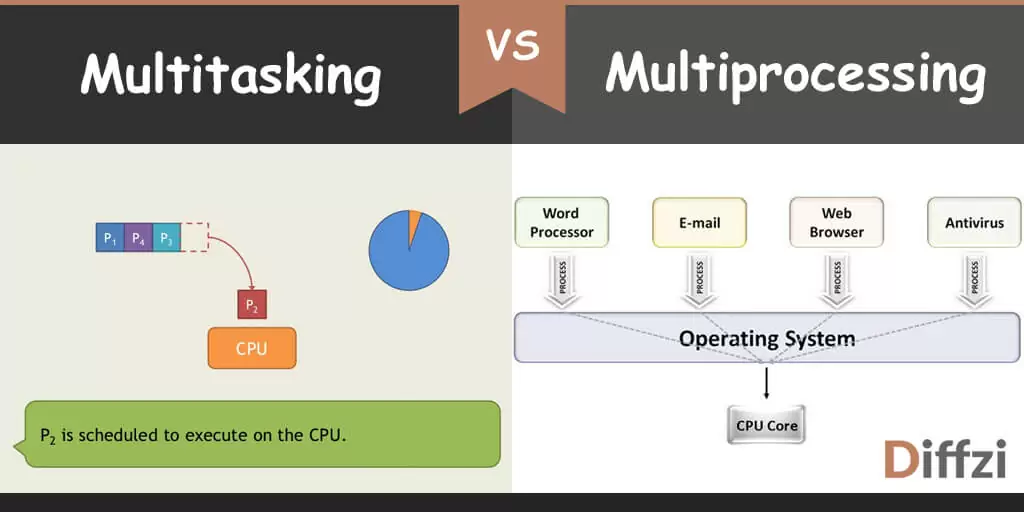

### Types of Multitasking:
- Process Based:
        Multiple threads running on the same operating system simultaneously.<br>
        Eg - Downloading, listening to songs and playing a game.<br>
    
- Thread Based:
        Single process consisting of separate tasks.<br>
        Eg - A game of PUBG consists of various threads.

### What is a thread ?
    - a separate and generally independent flow of execution in an application
    - a single process can have multiple threads.

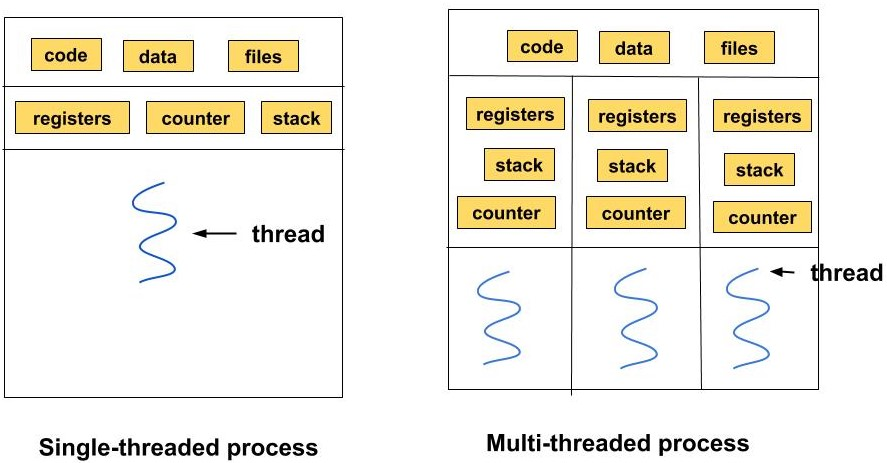

We can achieve multithreading in Python by importing the **threading** module.<br>

### When to use multithreading in Python:
- Multiple tasks need to be acheived.
- Tasks do not have inter-dependency.

# NOTE :
### Every process has one thread which is always executing and that is the main thread. For example when you open a python file to write programs there, that python file is your main thread. You can check that using the inbuilt special method __ name __ to get the name of the thread i.e. main  thread.
  
### The main controls the process before any child thread is executed.
### The main thread is actually the thread that creates child thread.

# How to create threads in Python ?

## 1. Without creating a class

In [10]:
import threading                         # importing the threading mnodule
import time
# from threading import *                # we can also import everything from the threading module
def new():
    for x in range(6):
        print('Child0 Executing', threading.currentThread().getName())
        time.sleep(0.5)
        
def new1(a):
    for x in range(6):
        print(a**2, threading.currentThread().getName())
        time.sleep(0.5)
        
def new2(a=0,b=0):
    for x in range(6):
        print(a*b, threading.currentThread().getName())
        time.sleep(0.5)
        
t1 = threading.Thread(target = new)      # creating a thread to execute new() function
t2 = threading.Thread(target = new1, args = (2,))
t3 = threading.Thread(target = new2, kwargs = {'a':3,'b':4})
t1.start()                               # to start the thread
t1.join()    

t2.start()
t2.join()                                

t3.start()
t3.join()                                # join() method indicates wait till the thread(t1) terminates.


print("Main Executing", threading.currentThread().getName())

Child0 Executing Thread-20
Child0 Executing Thread-20
Child0 Executing Thread-20
Child0 Executing Thread-20
Child0 Executing Thread-20
Child0 Executing Thread-20
4 Thread-21
4 Thread-21
4 Thread-21
4 Thread-21
4 Thread-21
4 Thread-21
12 Thread-22
12 Thread-22
12 Thread-22
12 Thread-22
12 Thread-22
12 Thread-22
Main Executing MainThread


## Understanding the Thread class constructor:

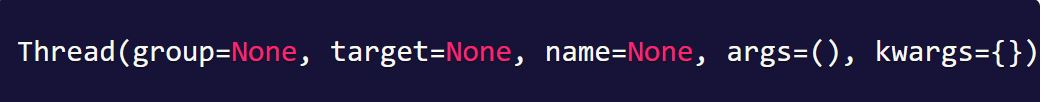

The constructor allows many arguments, some of which are required while some are not. Let's see what they are:<br>

**group**: Should be None. It is reserved for future extension.

**target**: This is the callable object or task to be invoked by the run() method. As you can see in the code example at the top, we have specified the function names thread1 and thread2 as the value for this argument. It's default value is None.

**name**: This is used to specify the thread name. By default, a unique name is generated following the format Thread-N, where N is a small decimal number.

**args**: This is the argument tuple for the target invocation. We can provide values in it which can be used in the traget method. It's default value is empty, i.e. ( )

**kwargs**: This is keyword argument dictionary for the target invocation. This defaults to { }.

In [12]:
# import threading                   
from threading import *                # we can also import everything from the threading module
import time
def new():
    for x in range(4):
        print('Child Executing', current_thread().getName())
        time.sleep(0.5)
        
t1 = Thread(target = new)               # creating a thread to execute new() function
t1.start()                              # to start the thread
t1.join(1)                              # join() method can also take the timer value for wait period
print("Main Executing", current_thread().getName())

Child Executing Thread-17
Child Executing Thread-17
Main Executing MainThread
Child Executing Thread-17
Child Executing Thread-17


## 2. By extending Thread class:

In [11]:
from threading import *

class A(Thread):            # extending the thread class 
    def run(self):                # run() method representing the thread's activity; in-built.    
        for i in range(5):
            print("Inside A")
            
class B(Thread):
    def run(self):
        for i in range(5):
            print("Inside B")
            
a1 = A()                    # creating thread objects
b1 = B() 
a1.start()
b1.start()

Inside AInside B
Inside B
Inside B
Inside B
Inside B

Inside A
Inside A
Inside A
Inside A


## run() method:
Method representing the thread's activity.

You may override this method in a subclass extending the Thread class of the threading module. The standard run() method invokes the callable object passed to the object's constructor as the target argument with sequential and keyword arguments taken from the args and kwargs arguments, respectively.

Here we have a simple example, where we have created a subclass in which we will override the run() method.


In [14]:
import threading
import time

class MyThread(threading.Thread):
  # overriding constructor
  def __init__(self, i):
    # calling parent class constructor
    threading.Thread.__init__(self)
    self.x = i
    
  # define your own run method
  def run(self):
    print("Value stored is: ", self.x)
    time.sleep(2)
    print("Exiting thread with value: ", self.x)
    

thread1 = MyThread(1)
thread1.start()
# thread1.join()
thread2 = MyThread(2)
thread2.start()

Value stored is: Value stored is:   2
1
Exiting thread with value: Exiting thread with value:   21



## 3. Without extending Thread class:

In [12]:
import threading
class ex:
    def myfunc(self, val):
        print(f"square of {val} is {val**2}")
        for x in range(3):
            print(threading.current_thread().getName())
            
myobj = ex()
thread1 = threading.Thread(target = myobj.myfunc, args=(3,), name = 'MySillyThread')
thread1.start()
print(threading.active_count())     # It is used to return the number of Thread objects that are active at any instant.
thread1.join()

print('Done', threading.current_thread().getName())


square of 3 is 9
MySillyThread
MySillyThread
MySillyThread
5
Done MainThread


### Example

In [16]:
from threading import *
class myclass:
    myvar = 24
    def myfunc(self, name):
        for i in range(5):
            print("Hello",name," in ", current_thread().getName())
            
myobj = myclass()
# dir(myobj)

thread1 = Thread(target = myobj.myfunc, args =('Sumit',), name= 'TechVidya')
thread1.start()
# thread1.join()
print("print statement in",current_thread().getName())

Helloprint statement in MainThread
 Sumit  in  TechVidya
Hello Sumit  in  TechVidya
Hello Sumit  in  TechVidya
Hello Sumit  in  TechVidya
Hello Sumit  in  TechVidya


In [16]:
import threading
import time

def name(nameList):
    for name in nameList:
        print(name)
        time.sleep(1)
            
def age(ageList):
    for age in ageList:
        print(age)
        time.sleep(1)
 

nameList = ['Uncle Tom','Harry Potter']
ageList = [50,28]

thread1 = threading.Thread(target = name, args = (nameList,))
thread2 = threading.Thread(target = age, args = (ageList,))
thread1.start()
thread2.start()

Uncle Tom
50
Harry Potter
28


# Advantages of Multithreading:
- Enhanced performance by decreased development time.
- Simplified and sreamlined program coding
- Simultaneous & Parallelized ocurrence of tasks
- Better use of CPU resource

### Use Case: Without Multithreading

In [21]:
import time
def myfun1(n):
    for x in n:
        print(x%2)
        
def myfun2(n):
    for x in n:
        print(x%3)
        
n = [2,4,3,6,7]
starttime = time.time()
myfun1(n)
myfun2(n)
endtime = time.time()
nothread_time = endtime-starttime
print('Time taken to execute the code without threading is: ', nothread_time)

0
0
1
0
1
2
1
0
0
1
Time taken to execute the code without threading is:  0.0


### Use Case: With Multithreading

In [24]:
import time
from threading import *
def myfun1(n):
    for x in n:
        print(x%2)
        
def myfun2(n):
    for x in n:
        print(x%3)
        
n = [2,4,3,6,7]
t1 = Thread(target = myfun1, args = (n,))
t2 = Thread(target = myfun2, args = (n,))

starttime = time.time()
t1.start()
t2.start()
t1.join()
t2.join()
endtime = time.time()
withthread_time = endtime-starttime
print('Time taken to execute the code with threading is: ', withthread_time)

0
0
1
0
1
2
1
0
0
1
Time taken to execute the code with threading is:  0.04797029495239258


In [25]:
print(nothread_time > withthread_time)

False


#### As you can see above that the time taken to execute the same set of instructions is less using threading in comparison to without threading. Thats why using threading we can acheive enhanced performance by decreased development time.

## Bonus! How to build your own clock ?

In [20]:
import time
while True:
    localtime = time.localtime()
    clock = time.strftime('%I:%M:%S:%p', localtime)
    print(clock, end = "",flush = True)
    print('\r', end = "", flush = True)
    time.sleep(1)

KeyboardInterrupt: 